<a href="https://colab.research.google.com/github/KOMBOU12/Marius/blob/main/Projet_TDA%2B_Signature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **📝Projet TDA + Signature**

Chaque fichier est composé de 10 colonnes :

🔹 Une colonne Temps (`temps`) - temps en ms ;

🔹8 colonnes de canaux EMG du bracelet MYO Thalmic (`channel1`... `channel8`) :  

*   0 - données non marquées `channel1`,
*   1 - main au repos `channel2`,
*   2 - main serrée en poing `channel3`,
*   3 - flexion du poignet `channel4`,
*   4 - extension du poignet `channel5`,
*   5 - déviations radiales `channel6`,
*   6 - déviations ulnaires `channel7`,
*   7 - paume étendue (le geste n'a pas été effectué par tous les sujets) `channel8`

🔹Une colonne `class` - le label des gestes. On a 7 classes uniques de 0 à 6.


**Objectif: L'objectif principal** est de prédire la valeur de la colonne `class` en fonction des données fournies par les 8 canaux en appliquant les méthodes de TDA.

**1- Description des données**

In [ ]:
import pandas as pd
# URL du fichier de données
url = "https://remivaucher.github.io/files/1_raw_data_13-12_22.03.16.txt"

# Charger les données dans un DataFrame
data = pd.read_csv(url, sep="\t")

# Afficher les premières lignes du DataFrame pour vérifier
data.head(10)

,time,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8,class
0,1,0.00001,-0.00002,-0.00001,-0.00003,0.00000,-0.00001,0.00000,-0.00001,0
1,5,0.00001,-0.00002,-0.00001,-0.00003,0.00000,-0.00001,0.00000,-0.00001,0
2,6,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0
3,7,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0
4,8,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0
5,9,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0
6,10,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0
7,11,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0
8,12,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0
9,13,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0


Notre jeu de données a **63196** lignes.

In [ ]:
data.shape

(63196, 10)

**🧮 Nombre de classes du jeu de données**

In [ ]:
# Calculer le nombre de classes uniques dans la colonne 'Class'
nombre_classes = data['class'].nunique()

# Afficher le nombre de classes
print("Nombre de classes uniques :", nombre_classes)

# Pour voir la liste des classes uniques
classes_uniques = data['class'].unique()
print("Classes uniques :", classes_uniques)

Nombre de classes uniques : 7
Classes uniques : [0 1 2 3 4 5 6]


In [ ]:
sumarize = data.describe()
print(sumarize)

               time      channel1      channel2      channel3      channel4  \
count  63196.000000  63196.000000  63196.000000  63196.000000  63196.000000   
mean   32777.490094     -0.000008     -0.000009     -0.000009     -0.000010   
std    18943.835626      0.000144      0.000134      0.000124      0.000155   
min        1.000000     -0.001110     -0.001020     -0.000910     -0.001040   
25%    16340.750000     -0.000030     -0.000040     -0.000050     -0.000040   
50%    32781.500000     -0.000010     -0.000010     -0.000010     -0.000010   
75%    49199.250000      0.000010      0.000020      0.000030      0.000020   
max    65661.000000      0.001270      0.001270      0.001270      0.001270   

           channel5     channel6      channel7      channel8         class  
count  63196.000000  63196.00000  63196.000000  63196.000000  63196.000000  
mean      -0.000012     -0.00001     -0.000008     -0.000008      1.212086  
std        0.000198      0.00016      0.000133      0.000

**Qualité des données**

In [ ]:
# Qualité des données
print("\nValeurs manquantes par colonne:")
print(data.isnull().sum())
print("\nNombre de doublons:")
print(data.duplicated().sum())


Valeurs manquantes par colonne:
time        0
channel1    0
channel2    0
channel3    0
channel4    0
channel5    0
channel6    0
channel7    0
channel8    0
class       0
dtype: int64

Nombre de doublons:
0


Il n'y a pas de valeurs manquantes, pas de doublons.

In [ ]:
distribution_classes = data['class'].value_counts()
print(distribution_classes)

class
0    41272
3     3816
1     3780
6     3747
5     3615
2     3525
4     3441
Name: count, dtype: int64


⚖️  La distribution montre un **déséquilibre** important entre les classes. Par exemple, la classe 0 contient 41 272 occurrences, alors que les autres classes en contiennent entre 3 441 et 3 816 occurrences. Cela pourrait poser des problèmes pour l'entraînement de modèles de Machine Learning, car les classes minoritaires risquent d'être sous-représentées dans les prédictions.

La somme de tous les nombres de classe est de (41272+3816+3780+3747+3615+3525+3441)= 63 196, ce qui correspond au nombre de lignes de notre data set (`data.shape = (63 196, 10)`)  

**📊 Histogramme pour les variables numérique**s

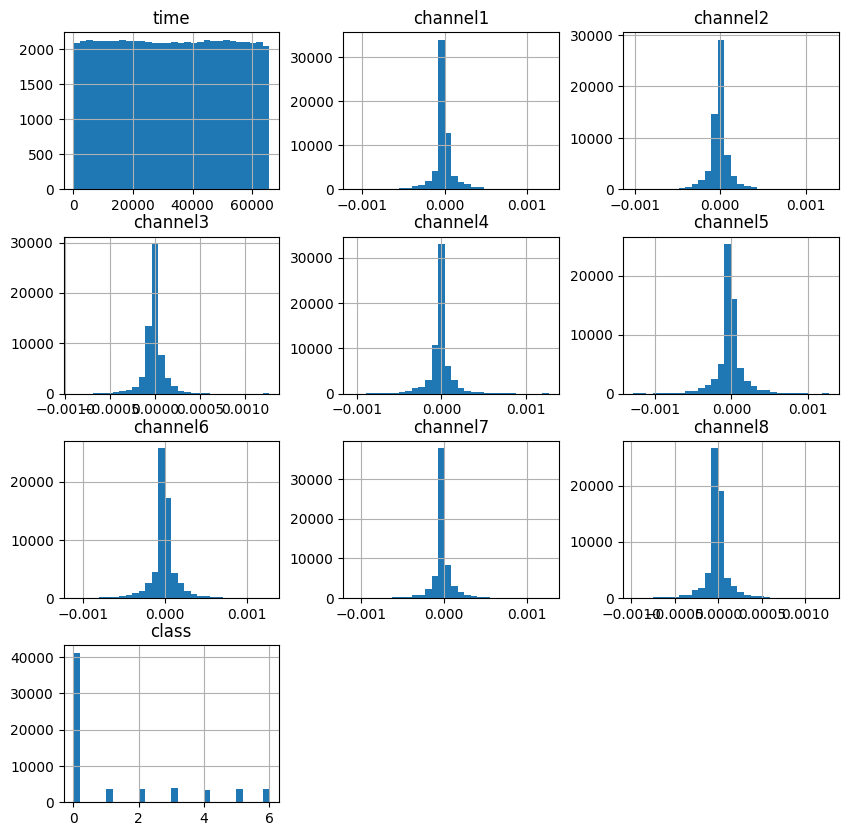

In [ ]:
# Histogramme pour les variables numériques
import matplotlib.pyplot as plt
data.hist(bins=30, figsize=(10, 10))
plt.show()

La classe 0 représente des **"données non marquées"** ou une situation de "repos" ou "absence de geste", il est **normal qu'elle soit plus fréquente**, surtout dans les contextes où les gestes spécifiques ne sont exécutés que brièvement et/ou moins fréquemment. Ensuite la classe 3 est la plus fréquente. D'accord que ce n'est pas très visible sur mon histogramme.

**Heatmap**

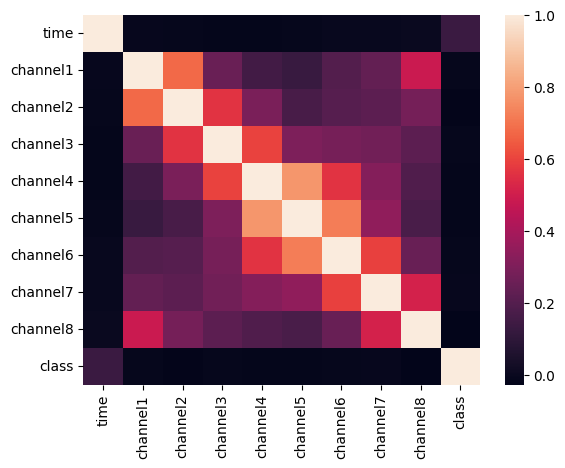

In [ ]:
# heatmap
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(data.corr())
plt.show()

💡 On observe pas une corrélation entre un channel et class. Il n'y a pas un channel qui a plus d'impact que d'autres sur la classe. On observe une corrélation entre le "channel 4" et le "channel 5", entre "channel 6" et le "channel 5", "channel 1" et le "channel 2".

**2. Découper la série temporelle de manière à récupérer plusieurs séries à label unique**

In [ ]:
# Identifier où les changements de label se produisent
changes = data['class'].diff().ne(0)  # diff() calcule la différence entre chaque élément et son précédent
change_indices = changes[changes].index.tolist()  # récupérer les indices des changements

# Ajouter le premier index de la série et le dernier index de la série pour compléter les sous-séries
if 0 not in change_indices:
    change_indices.insert(0, 0)
change_indices.append(len(data))

# Créer les sous-séries
sub_series = []
for i in range(len(change_indices) - 1):
    sub_series.append(data.iloc[change_indices[i]:change_indices[i + 1]])

# Afficher le résultat
# for index, series in enumerate(sub_series):
#     print(f"Sous-série {index + 1} avec label unique:")
#     print(series.head())  # afficher les premières lignes de chaque sous-série
#     print("\n")


In [ ]:
import numpy as np
s = []
for i in range(len(sub_series)):
    print(f"Sous-série {i + 1} avec label unique:")
    print(sub_series[i].shape)
    s = sub_series[i].shape
    s = np.sum(s)

print(s)

Sous-série 1 avec label unique:
(2287, 10)
Sous-série 2 avec label unique:
(2115, 10)
Sous-série 3 avec label unique:
(2022, 10)
Sous-série 4 avec label unique:
(1794, 10)
Sous-série 5 avec label unique:
(4316, 10)
Sous-série 6 avec label unique:
(1988, 10)
Sous-série 7 avec label unique:
(3473, 10)
Sous-série 8 avec label unique:
(1735, 10)
Sous-série 9 avec label unique:
(3815, 10)
Sous-série 10 avec label unique:
(1858, 10)
Sous-série 11 avec label unique:
(3480, 10)
Sous-série 12 avec label unique:
(1958, 10)
Sous-série 13 avec label unique:
(2892, 10)
Sous-série 14 avec label unique:
(1665, 10)
Sous-série 15 avec label unique:
(1624, 10)
Sous-série 16 avec label unique:
(1731, 10)
Sous-série 17 avec label unique:
(3996, 10)
Sous-série 18 avec label unique:
(1828, 10)
Sous-série 19 avec label unique:
(3748, 10)
Sous-série 20 avec label unique:
(1706, 10)
Sous-série 21 avec label unique:
(3830, 10)
Sous-série 22 avec label unique:
(1757, 10)
Sous-série 23 avec label unique:
(4172, 1

In [ ]:
import numpy as np

# Exemple de données simulées pour représenter les sous-séries
sub_series = [
    (2287, 10), (2115, 10), (2022, 10), (1794, 10), (4316, 10),
    (1988, 10), (3473, 10), (1735, 10), (3815, 10), (1858, 10),
    (3480, 10), (1958, 10), (2892, 10), (1665, 10), (1624, 10),
    (1731, 10), (3996, 10), (1828, 10), (3748, 10), (1706, 10),
    (3830, 10), (1757, 10), (4172, 10), (1789, 10), (1617, 10)
]

# Calcul de la somme des premiers éléments des 25 premières sous-séries
total_sum = 0
for i in range(min(25, len(sub_series))):  # S'assure de ne pas dépasser la longueur de sub_series
    total_sum += sub_series[i][0]  # Prend uniquement le nombre de lignes (premier élément du tuple)

print(f"La somme des premiers éléments des 25 premières sous-séries est : {total_sum}")


La somme des premiers éléments des 25 premières sous-séries est : 63196


**3. Utiliser la TDA pour créer un modèle de classification. Que peut on dire?**

Installation des bibliothèques Python

In [ ]:
!pip install gudhi
!pip install giotto-tda

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 30.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 92.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 558.8/558.8 kB 35.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 84.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 460.6/460.6 kB 31.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 63.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.0
    Uninstalling scikit-learn-1.6.0:
      Successfully uninstalled scikit-learn-1.6.0


 Importation des bibliothèques nécessaires pour effectuer une analyse de données

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from gtda.homology import VietorisRipsPersistence
from gtda.diagrams import PersistenceEntropy

**Préparation pour la TDA**

Créez des ensembles d'entraînement et de test à partir des sous-séries.

In [ ]:
# Collecter les données et les labels
X_tda = []
y_tda = []

for series in sub_series:
    X_tda.append(series.drop(columns=['class']).values)  # Les colonnes des caractéristiques
    y_tda.append(series['class'].iloc[0])  # Le label unique de la sous-série

# Convertir en tableau numpy
X_tda = np.array(X_tda, dtype=object)
y_tda = np.array(y_tda)

# Diviser en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_tda, y_tda, test_size=0.3, random_state=42)


**Extraction de caractéristiques TDA**

Appliquez Vietoris-Rips Persistence sur chaque sous-série.

In [ ]:
# Ajouter une troisième dimension à chaque série (reshape en 3D)
X_train_reshaped = [series[:, :, np.newaxis] for series in X_train]
X_test_reshaped = [series[:, :, np.newaxis] for series in X_test]

In [ ]:
# Appliquer VietorisRipsPersistence
tda = VietorisRipsPersistence(metric='euclidean', homology_dimensions=(0, 1))

X_train_tda = [tda.fit_transform(series) for series in X_train_reshaped]
X_test_tda = [tda.transform(series) for series in X_test_reshaped]


In [ ]:
print("Shapes des séries reshaped pour le train :")
for idx, series in enumerate(X_train_reshaped):
    print(f"Série {idx}: {series.shape}")

print("Shapes des séries reshaped pour le test :")
for idx, series in enumerate(X_test_reshaped):
    print(f"Série {idx}: {series.shape}")

In [ ]:
X_train_reshaped[10].shape

(3748, 9, 1)

In [ ]:
fixed_length = 10  # Longueur fixe pour tous les vecteurs

 **Uniformisations les vecteurs**

On ajoute une fonction pour tronquer ou compléter les vecteurs

In [ ]:
def pad_or_truncate(vector, length):
    if len(vector) > length:
        # Tronquer si le vecteur est trop long
        return vector[:length]
    else:
        # Compléter avec des zéros si le vecteur est trop court
        return np.pad(vector, (0, length - len(vector)), mode='constant')


**Calcul et uniformisation des caractéristiques**

On applique *PersistenceEntropy*, puis on uniformise la longueur des vecteurs avec la fonction *pad_or_truncate*

In [ ]:
pip install --upgrade gudhi


In [ ]:
from gtda.diagrams import PersistenceEntropy
#from gudhi.representations import PersistenceEntropy
pe = PersistenceEntropy()

X_train_features = []
for diagram in X_train_tda:
    if diagram.shape[0] > 0:  # Vérifie que le diagramme n'est pas vide
        vector = pe.fit_transform(diagram)
    else:
        vector = np.zeros(fixed_length)  # Remplace les diagrammes vides par un vecteur nul
    X_train_features.append(pad_or_truncate(vector, fixed_length))

X_test_features = []
for diagram in X_test_tda:
    if diagram.shape[0] > 0:
        vector = pe.transform(diagram)
    else:
        vector = np.zeros(fixed_length)
    X_test_features.append(pad_or_truncate(vector, fixed_length))

# Convertir en tableaux numpy
X_train_features = np.array(X_train_features)
X_test_features = np.array(X_test_features)


**Vérification**

On vérifie que toutes les caractéristiques ont une forme uniforme

In [ ]:
print("Shape des caractéristiques d'entraînement :", X_train_features.shape)
print("Shape des caractéristiques de test :", X_test_features.shape)

Shape des caractéristiques d'entraînement : (17, 10, 2)
Shape des caractéristiques de test : (8, 10, 2)


**Aplatir les caractéristiques**

On applique un flattening aux tableaux de caractéristiques :

In [ ]:
# Aplatir les caractéristiques en 2D
X_train_features_flat = X_train_features.reshape(X_train_features.shape[0], -1)
X_test_features_flat = X_test_features.reshape(X_test_features.shape[0], -1)




**Entraînement du modèle**

On entraîne le modèle sur les caractéristiques aplaties

In [ ]:
# Entraîner le modèle
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_features_flat, y_train)

# Prédictions
y_pred = clf.predict(X_test_features_flat)

# Évaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.25
Classification Report:
               precision    recall  f1-score   support

           0       0.29      0.67      0.40         3
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         2

    accuracy                           0.25         8
   macro avg       0.06      0.13      0.08         8
weighted avg       0.11      0.25      0.15         8



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.



*   L'évaluation de notre modèle donne une **précision globale de 25%**, ce qui signifie qu'il a correctement prédit le label dans 2 cas sur 8.
*   Le jeu de données est déséquilibré : certaines classes ont très peu d'exemples **(2, 5)**, ce qui rend difficile l'apprentissage de ces classes pour le modèle.
*   Le modèle a tendance à privilégier la classe 0 (majoritaire dans le jeu de test).
*   Avec seulement **17 séries** pour l'entraînement et **8 séries** pour le test, le jeu de données est très petit, ce qui limite la capacité du modèle à généraliser.

**4. Faire de même en enlevant les classes 0. Que peut on dire?**

In [ ]:
# Supprimer les échantillons de la classe 0
data_no_class_0 = data[data['class'] != 0]

# Recréer les sous-séries après suppression de la classe 0
changes = data_no_class_0['class'].diff().ne(0)
change_indices = changes[changes].index.tolist()

if 0 not in change_indices:
    change_indices.insert(0, 0)
change_indices.append(len(data_no_class_0))

sub_series_no_class_0 = [
    data_no_class_0.iloc[change_indices[i]:change_indices[i + 1]]
    for i in range(len(change_indices) - 1)
]

In [ ]:
# Création des données TDA (X_tda, y_tda) avec vérification des sous-séries vides
X_tda = []
y_tda = []

for series in sub_series_no_class_0:
    if not series.empty:  # Vérifier que la sous-série n'est pas vide
        X_tda.append(series.drop(columns=['class']).values)
        y_tda.append(series['class'].iloc[0])

# Convertir en tableaux numpy
X_tda = np.array(X_tda, dtype=object)
y_tda = np.array(y_tda)

# Diviser en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_tda, y_tda, test_size=0.3, random_state=42)

# Ajouter une troisième dimension (reshape en 3D)
X_train_reshaped = [series[:, :, np.newaxis] for series in X_train]
X_test_reshaped = [series[:, :, np.newaxis] for series in X_test]

# Appliquer VietorisRipsPersistence
tda = VietorisRipsPersistence(metric='euclidean', homology_dimensions=(0, 1))
X_train_tda = [tda.fit_transform(series) for series in X_train_reshaped]
X_test_tda = [tda.transform(series) for series in X_test_reshaped]

# Ajouter une étape pour calculer PersistenceEntropy
pe = PersistenceEntropy()

fixed_length = 10  # Longueur fixe pour les vecteurs

def pad_or_truncate(vector, length):
    if len(vector) > length:
        return vector[:length]
    else:
        return np.pad(vector, (0, length - len(vector)), mode='constant')

X_train_features = []
for diagram in X_train_tda:
    if diagram.shape[0] > 0:
        vector = pe.fit_transform(diagram)
    else:
        vector = np.zeros(fixed_length)
    X_train_features.append(pad_or_truncate(vector, fixed_length))

X_test_features = []
for diagram in X_test_tda:
    if diagram.shape[0] > 0:
        vector = pe.transform(diagram)
    else:
        vector = np.zeros(fixed_length)
    X_test_features.append(pad_or_truncate(vector, fixed_length))

# Convertir en tableaux numpy
X_train_features = np.array(X_train_features)
X_test_features = np.array(X_test_features)

# Aplatir les caractéristiques en 2D
X_train_features_flat = X_train_features.reshape(X_train_features.shape[0], -1)
X_test_features_flat = X_test_features.reshape(X_test_features.shape[0], -1)

# Entraîner le modèle
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_features_flat, y_train)

# Prédictions
y_pred = clf.predict(X_test_features_flat)

# Évaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.0
Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00       0.0
           2       0.00      0.00      0.00       1.0
           4       0.00      0.00      0.00       1.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.

In [ ]:
print(data_no_class_0['class'].value_counts())


class
3    3816
1    3780
6    3747
5    3615
2    3525
4    3441
Name: count, dtype: int64


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report

smote = SMOTE(random_state=42, k_neighbors=1)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_features_flat, y_train)

clf.fit(X_train_resampled, y_train_resampled)
y_pred = clf.predict(X_test_features_flat)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))



ValueError: Expected n_neighbors <= n_samples,  but n_samples = 1, n_neighbors = 2

  **5. Créer le complexe simplicial sur les séries temporelles de la question 2 Pouvait on deviner la différence entre les questions 3 et 4 en regardant la persistance de ce complexe?**  

In [ ]:
!pip install gudhi
!pip install giotto-tda

In [4]:
import pandas as pd
# URL du fichier de données
url = "https://remivaucher.github.io/files/1_raw_data_13-12_22.03.16.txt"

# Charger les données dans un DataFrame
data = pd.read_csv(url, sep="\t")

# Afficher les premières lignes du DataFrame pour vérifier
data.head(10)

from sklearn.preprocessing import MinMaxScaler

# Identifier les colonnes numériques (en excluant la colonne 'class' si elle existe)
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Créer une instance de MinMaxScaler
scaler = MinMaxScaler()

# Appliquer la normalisation uniquement aux colonnes numériques
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

On applique une **normalisation** avec `MinMaxScaler`

In [5]:
from sklearn.preprocessing import MinMaxScaler

# Identifier les colonnes numériques (en excluant la colonne 'class' si elle existe)
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Créer une instance de MinMaxScaler
scaler = MinMaxScaler()

# Appliquer la normalisation uniquement aux colonnes numériques
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

On conserve les sous-séries basées sur les changements de labels

In [6]:
# Identifier où les changements de label se produisent
changes = data['class'].diff().ne(0)  # diff() calcule la différence entre chaque élément et son précédent
change_indices = changes[changes].index.tolist()  # récupérer les indices des changements

# Ajouter le premier index de la série et le dernier index de la série pour compléter les sous-séries
if 0 not in change_indices:
    change_indices.insert(0, 0)
change_indices.append(len(data))

# Créer les sous-séries
sub_series = []
for i in range(len(change_indices) - 1):
    sub_series.append(data.iloc[change_indices[i]:change_indices[i + 1]])


In [7]:
import gudhi as gd
from sklearn.preprocessing import MinMaxScaler


In [ ]:
# Normalisation des colonnes numériques de chaque sous-série
normalized_sub_series = []
scaler = MinMaxScaler()

for sub in sub_series:
    # Identifier les colonnes numériques
    numeric_columns = sub.select_dtypes(include=['float64', 'int64']).columns

    # Normaliser les colonnes numériques
    sub_scaled = sub.copy()
    sub_scaled[numeric_columns] = scaler.fit_transform(sub[numeric_columns])
    normalized_sub_series.append(sub_scaled)


On crée des **complexes simpliciaux** pour chaque sous-série, basés sur le modèle de Vietoris-Rips.

In [ ]:
import gc
# Paramètres pour la filtration de Rips
max_edge_length = 0.5  # Longueur maximale des arêtes
max_dimension = 2      # Dimension maximale des simplices

rips_complexes = []
batch_size = 10
max_points = 50  # Limite encore plus stricte pour chaque sous-série
for batch_start in range(0, len(normalized_sub_series), batch_size):
    batch = normalized_sub_series[batch_start:batch_start + batch_size]
    for i, sub in enumerate(batch):
        # Réduction des points
        if len(sub) > max_points:
            sub = sub.sample(n=max_points, random_state=42)

        # Extraction des points
        point_cloud = sub.select_dtypes(include=['float64', 'int64']).values

        # Création du complexe de Rips
        rips_complex = gd.RipsComplex(points=point_cloud, max_edge_length=max_edge_length)
        simplex_tree = rips_complex.create_simplex_tree(max_dimension=max_dimension)

        # Option : Ne pas sauvegarder tous les complexes
        print(f"Sous-série {batch_start + i + 1}: Complexe créé avec {simplex_tree.num_simplices()} simplices.")
    gc.collect()


Sous-série 1: Complexe créé avec 628 simplices.
Sous-série 2: Complexe créé avec 244 simplices.
Sous-série 3: Complexe créé avec 3244 simplices.
Sous-série 4: Complexe créé avec 389 simplices.
Sous-série 5: Complexe créé avec 9518 simplices.
Sous-série 6: Complexe créé avec 1076 simplices.
Sous-série 7: Complexe créé avec 3812 simplices.
Sous-série 8: Complexe créé avec 1301 simplices.
Sous-série 9: Complexe créé avec 6456 simplices.
Sous-série 10: Complexe créé avec 742 simplices.
Sous-série 11: Complexe créé avec 6809 simplices.
Sous-série 12: Complexe créé avec 1274 simplices.
Sous-série 13: Complexe créé avec 6974 simplices.
Sous-série 14: Complexe créé avec 187 simplices.
Sous-série 15: Complexe créé avec 5067 simplices.
Sous-série 16: Complexe créé avec 672 simplices.
Sous-série 17: Complexe créé avec 5594 simplices.
Sous-série 18: Complexe créé avec 670 simplices.
Sous-série 19: Complexe créé avec 4542 simplices.
Sous-série 20: Complexe créé avec 894 simplices.
Sous-série 21: Co

In [ ]:
import gc
# Paramètres pour la filtration de Rips
max_edge_length = 0.5  # Longueur maximale des arêtes
max_dimension = 2      # Dimension maximale des simplices

rips_complexes = []
batch_size = 10
max_points = 50  # Limite encore plus stricte pour chaque sous-série

for batch_start in range(0, len(normalized_sub_series), batch_size):
    batch = normalized_sub_series[batch_start:batch_start + batch_size]
    for i, sub in enumerate(batch):
        # Réduction des points
        if len(sub) > max_points:
            sub = sub.sample(n=max_points, random_state=42)

        # Extraction des points
        point_cloud = sub.select_dtypes(include=['float64', 'int64']).values

        # Création du complexe de Rips
        rips_complex = gd.RipsComplex(points=point_cloud, max_edge_length=max_edge_length)
        simplex_tree = rips_complex.create_simplex_tree(max_dimension=max_dimension)

        # Sauvegarder le complexe simplicial dans la liste
        rips_complexes.append(simplex_tree)

        print(f"Sous-série {batch_start + i + 1}: Complexe créé avec {simplex_tree.num_simplices()} simplices.")
    gc.collect()


Sous-série 1: Complexe créé avec 628 simplices.
Sous-série 2: Complexe créé avec 244 simplices.
Sous-série 3: Complexe créé avec 3244 simplices.
Sous-série 4: Complexe créé avec 389 simplices.
Sous-série 5: Complexe créé avec 9518 simplices.
Sous-série 6: Complexe créé avec 1076 simplices.
Sous-série 7: Complexe créé avec 3812 simplices.
Sous-série 8: Complexe créé avec 1301 simplices.
Sous-série 9: Complexe créé avec 6456 simplices.
Sous-série 10: Complexe créé avec 742 simplices.
Sous-série 11: Complexe créé avec 6809 simplices.
Sous-série 12: Complexe créé avec 1274 simplices.
Sous-série 13: Complexe créé avec 6974 simplices.
Sous-série 14: Complexe créé avec 187 simplices.
Sous-série 15: Complexe créé avec 5067 simplices.
Sous-série 16: Complexe créé avec 672 simplices.
Sous-série 17: Complexe créé avec 5594 simplices.
Sous-série 18: Complexe créé avec 670 simplices.
Sous-série 19: Complexe créé avec 4542 simplices.
Sous-série 20: Complexe créé avec 894 simplices.
Sous-série 21: Co

Les sous-séries génèrent des complexes de tailles variées, ce qui est attendu. Par exemple :

📌 Sous-série 3 : 3244 simplices

📌 Sous-série 5 : 9518 simplices

📌 Sous-série 19 : 4542 simplices

Sous-série 1: Diagramme de persistance


/usr/local/lib/python3.11/dist-packages/gudhi/persistence_graphical_tools.py:107: UserWarning: usetex mode requires TeX.
  warnings.warn("usetex mode requires TeX.")


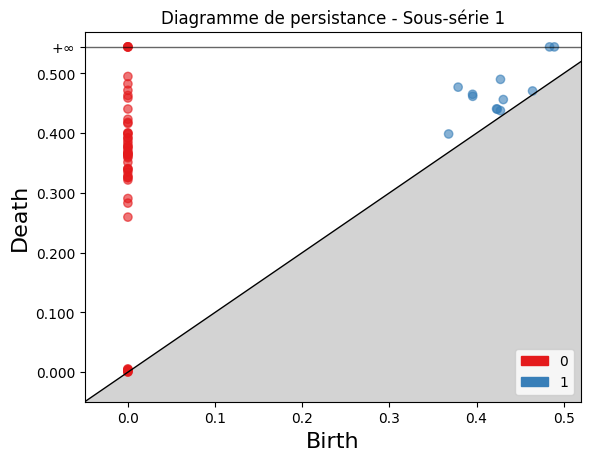

Sous-série 2: Diagramme de persistance


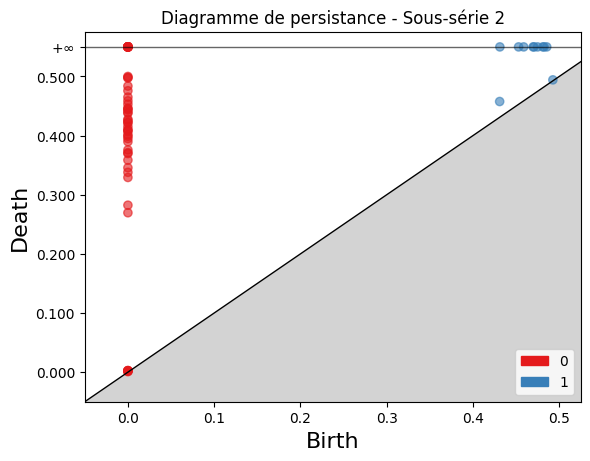

Sous-série 3: Diagramme de persistance


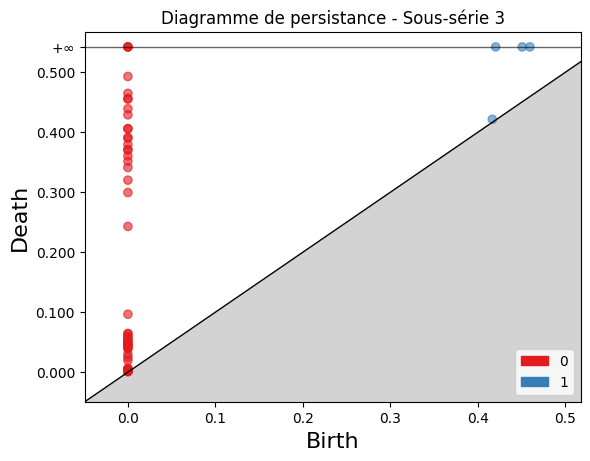

Sous-série 4: Diagramme de persistance


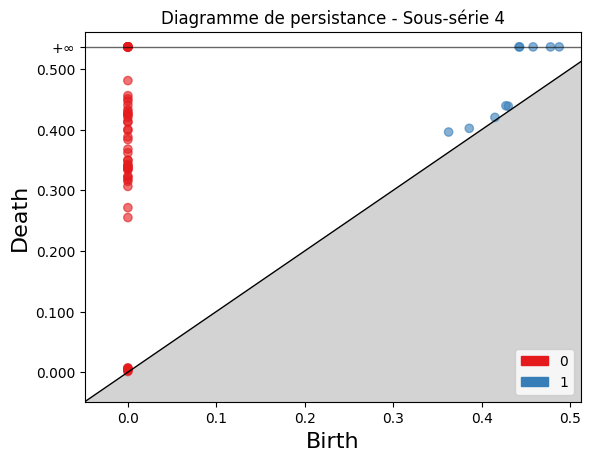

Sous-série 5: Diagramme de persistance


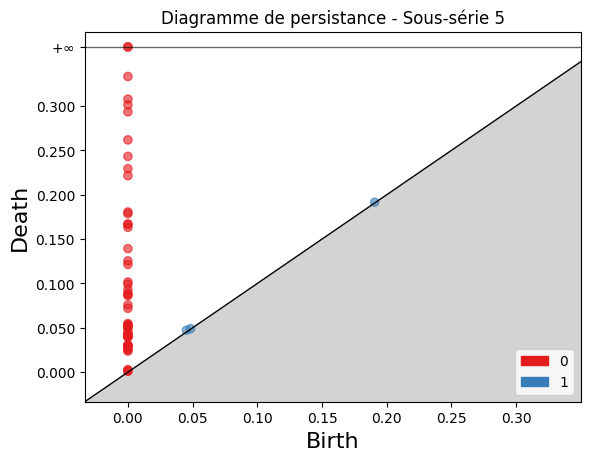

Sous-série 6: Diagramme de persistance


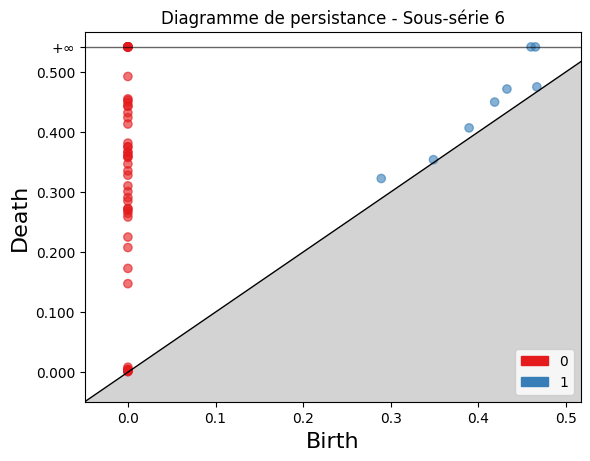

Sous-série 7: Diagramme de persistance


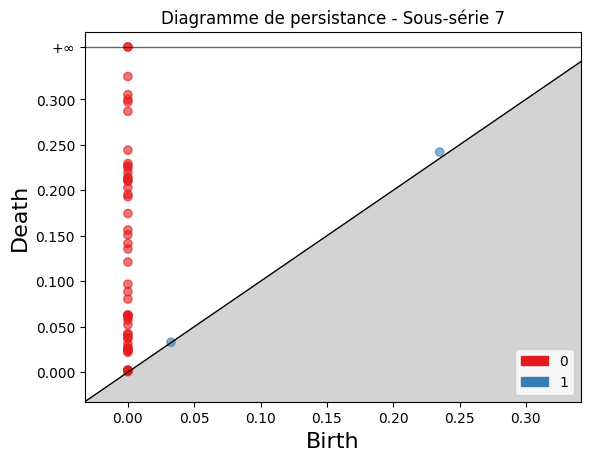

Sous-série 8: Diagramme de persistance


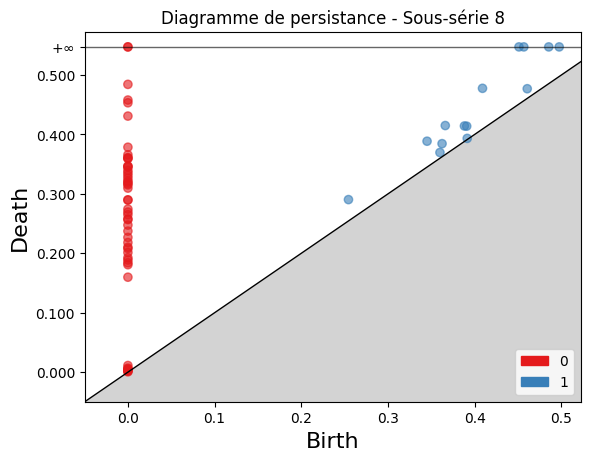

Sous-série 9: Diagramme de persistance


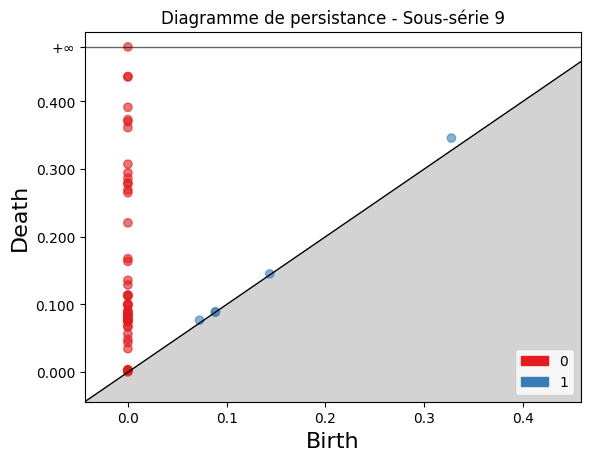

Sous-série 10: Diagramme de persistance


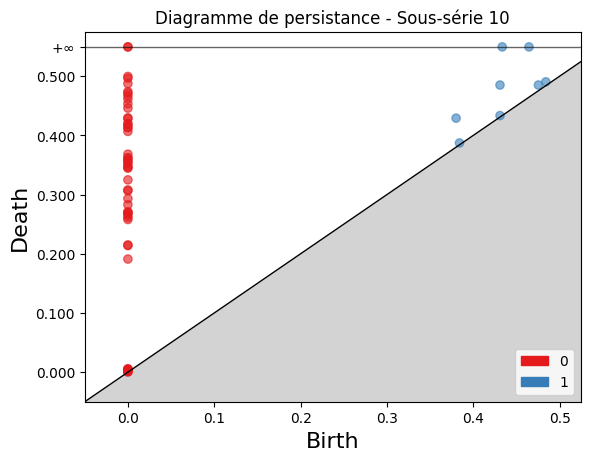

Sous-série 11: Diagramme de persistance


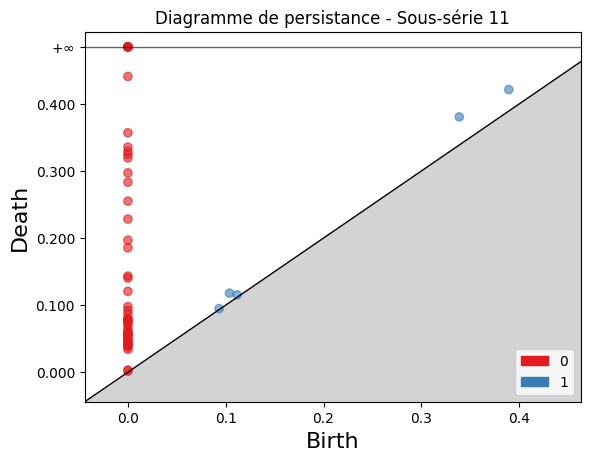

Sous-série 12: Diagramme de persistance


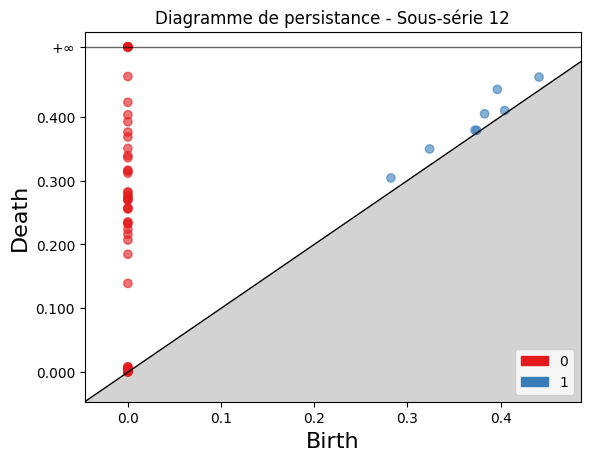

Sous-série 13: Diagramme de persistance


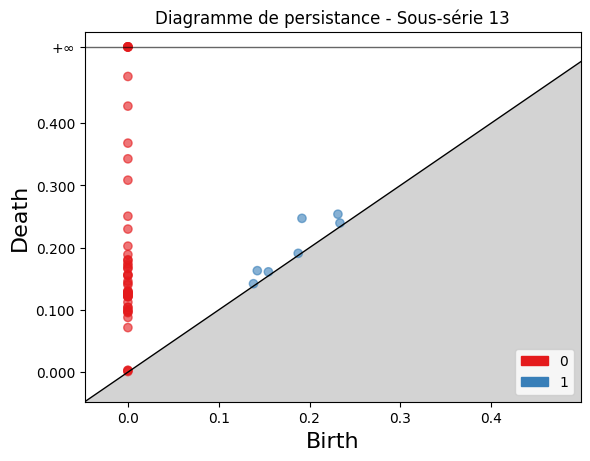

Sous-série 14: Diagramme de persistance


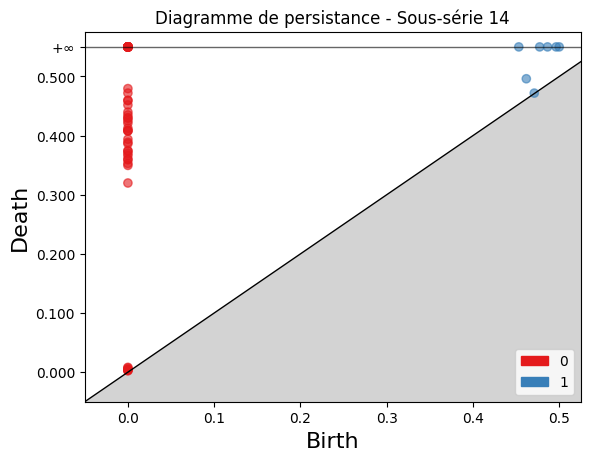

Sous-série 15: Diagramme de persistance


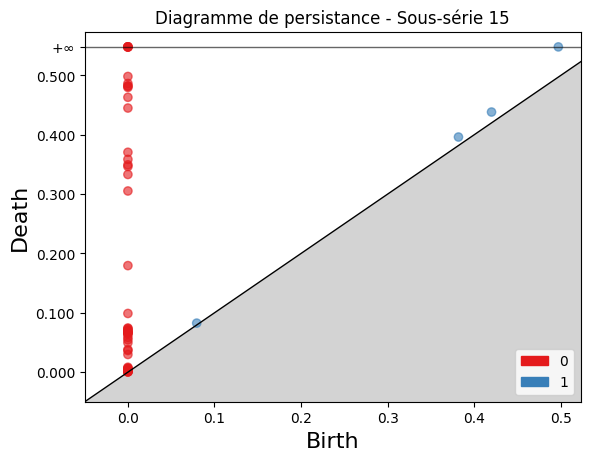

Sous-série 16: Diagramme de persistance


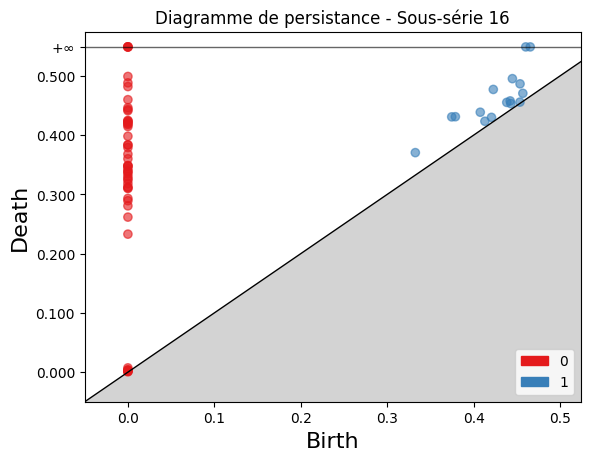

Sous-série 17: Diagramme de persistance


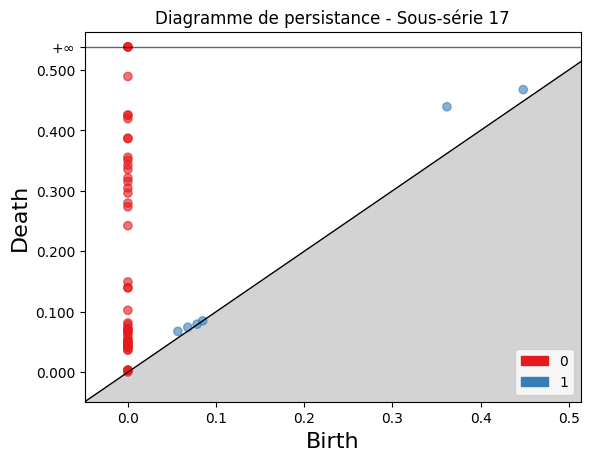

Sous-série 18: Diagramme de persistance


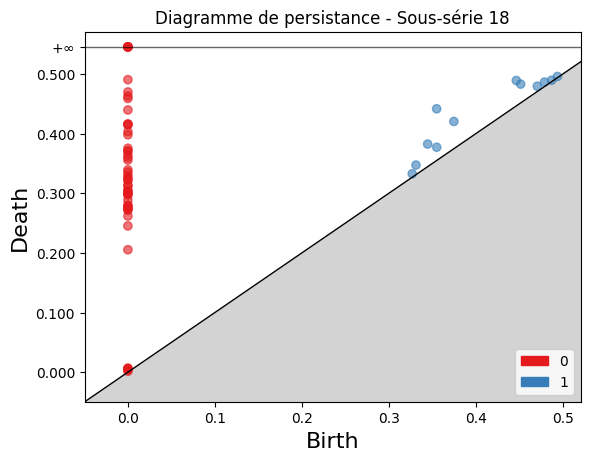

Sous-série 19: Diagramme de persistance


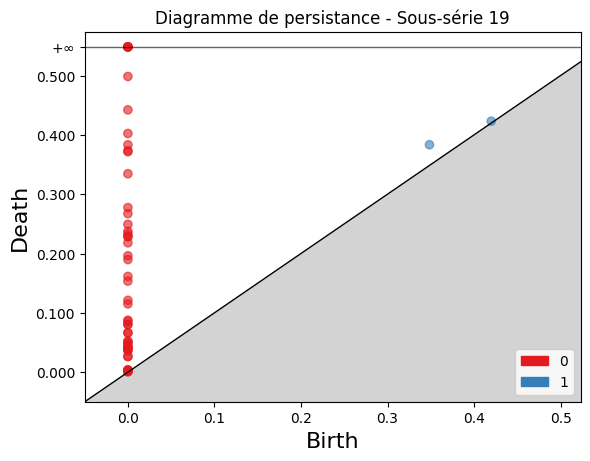

Sous-série 20: Diagramme de persistance


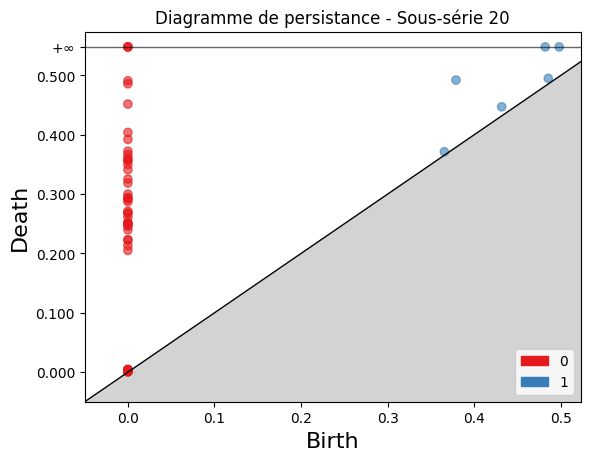

Sous-série 21: Diagramme de persistance


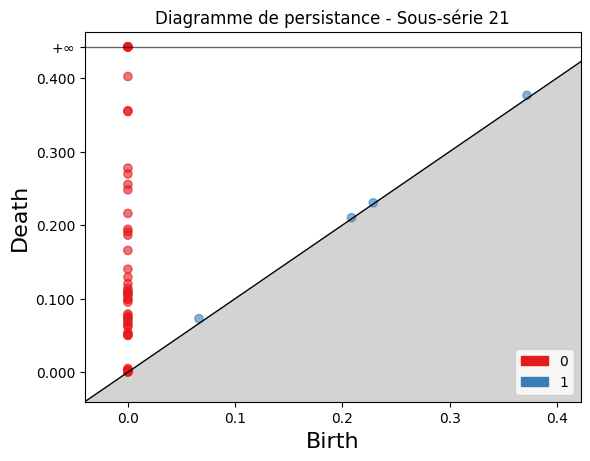

Sous-série 22: Diagramme de persistance


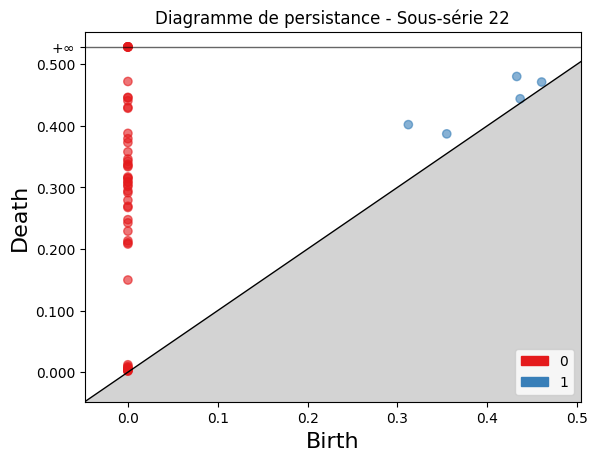

Sous-série 23: Diagramme de persistance


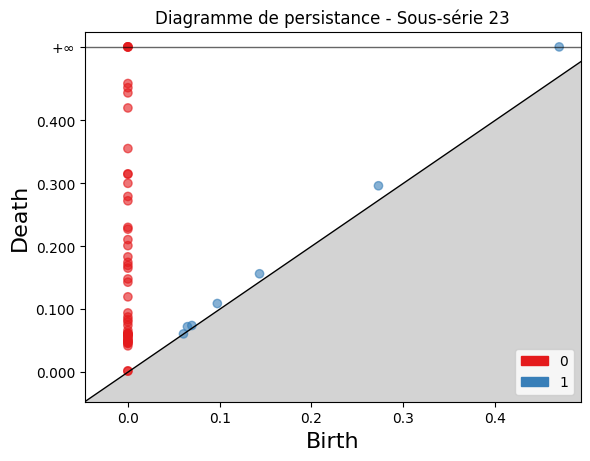

Sous-série 24: Diagramme de persistance


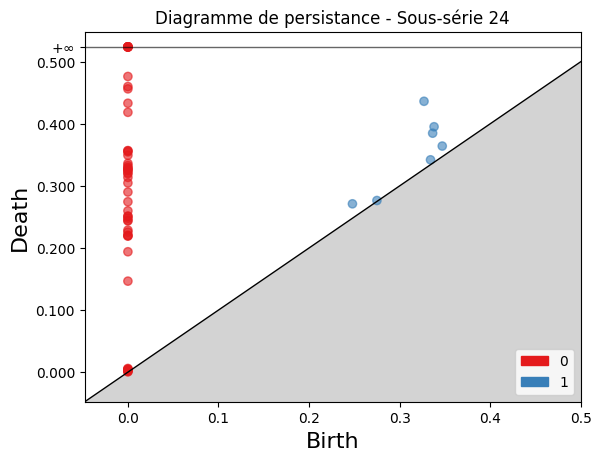

Sous-série 25: Diagramme de persistance


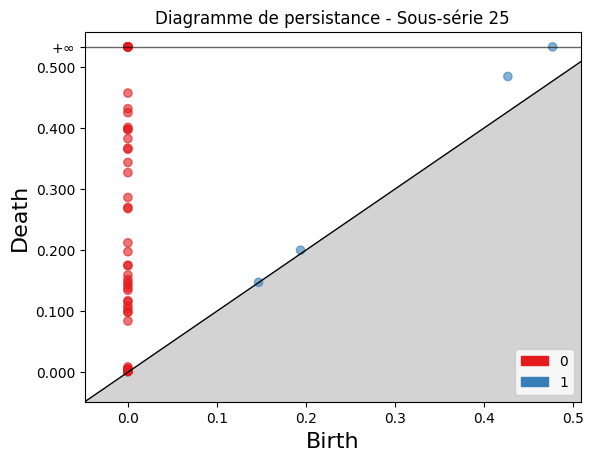

In [ ]:
import gudhi as gd
import matplotlib.pyplot as plt

# Calcul et visualisation de la persistance pour chaque sous-série
for i, simplex_tree in enumerate(rips_complexes):
    # Calculer la persistance
    pers = simplex_tree.persistence()

    # Afficher le diagramme de persistance
    print(f"Sous-série {i + 1}: Diagramme de persistance")
    gd.plot_persistence_diagram(pers)
    plt.title(f"Diagramme de persistance - Sous-série {i + 1}")
    plt.show()


Axe des abscisses (Birth) : Indique la valeur de filtration à laquelle une caractéristique topologique (composante connexe, cycle, etc.) apparaît.
Axe des ordonnées (Death) : Indique la valeur de filtration à laquelle cette caractéristique disparaît.
Les points proches de la diagonale (ligne
y=x) représentent des caractéristiques éphémères (faible persistance, souvent associées à du bruit).
Les points loin de la diagonale sont plus persistants et souvent plus significatifs.

Ignore les points proches de la diagonale, car ils représentent des caractéristiques peu robustes.

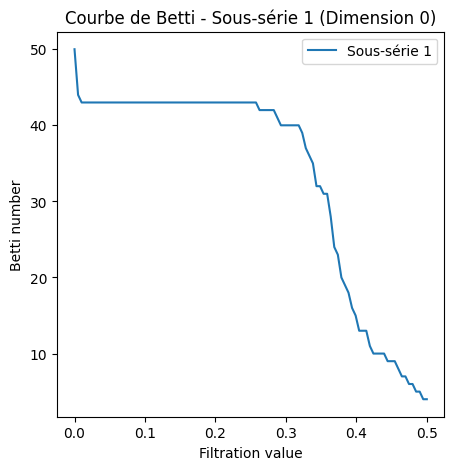

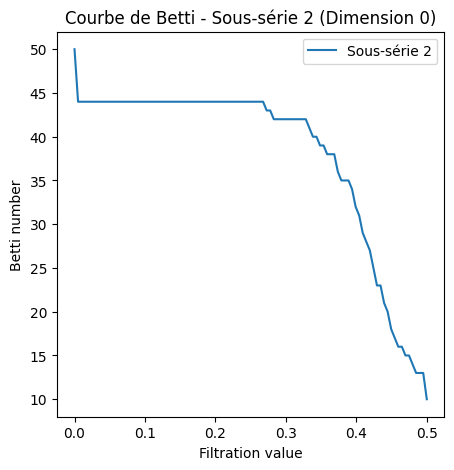

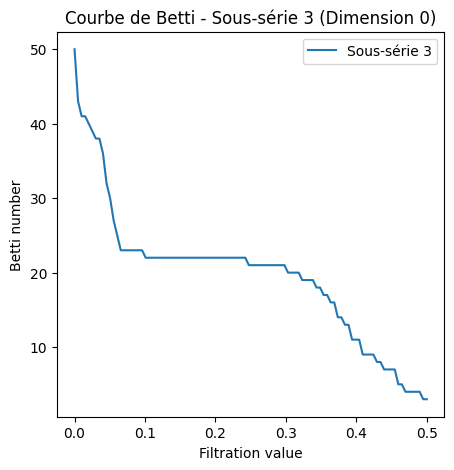

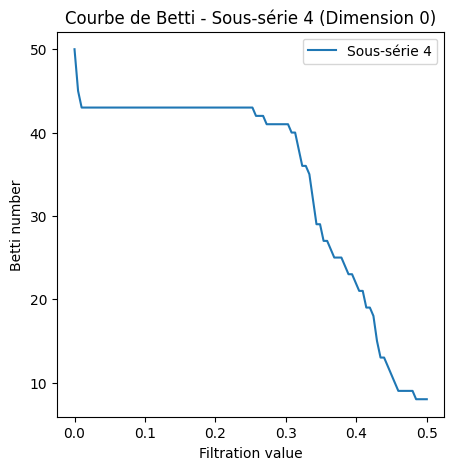

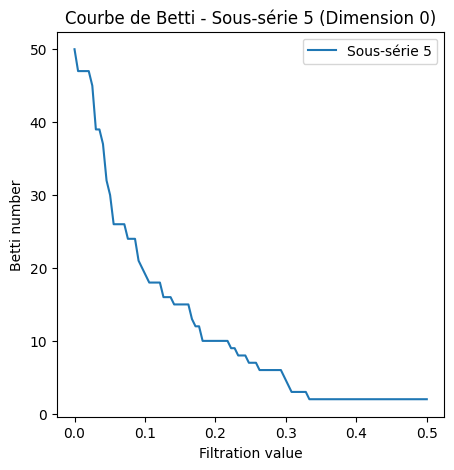

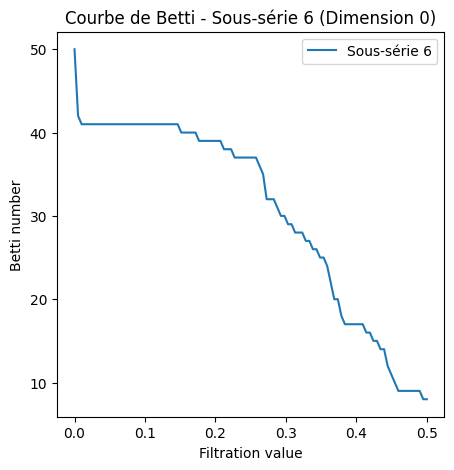

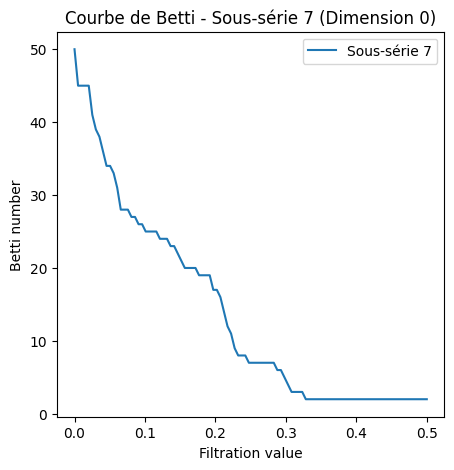

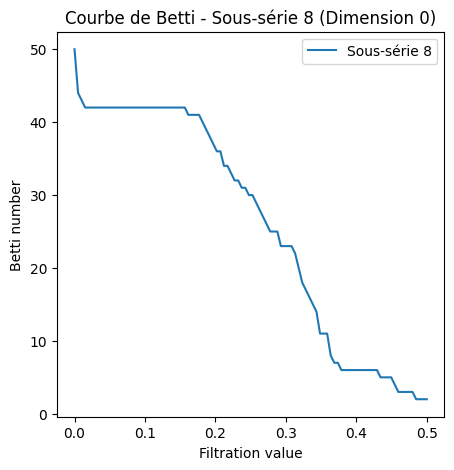

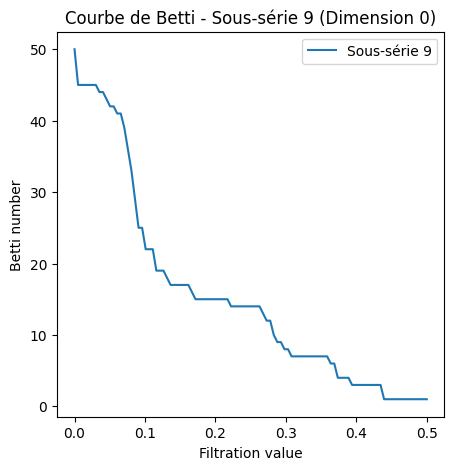

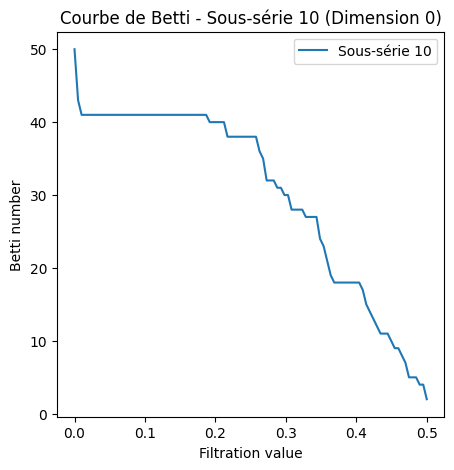

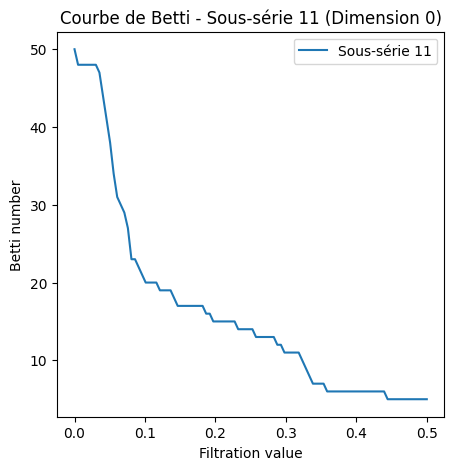

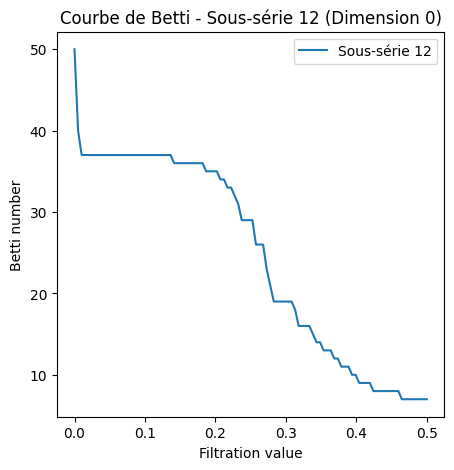

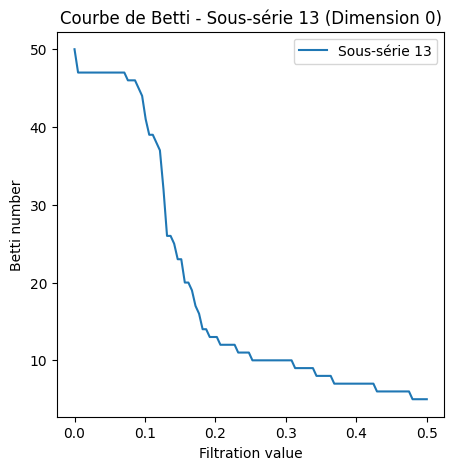

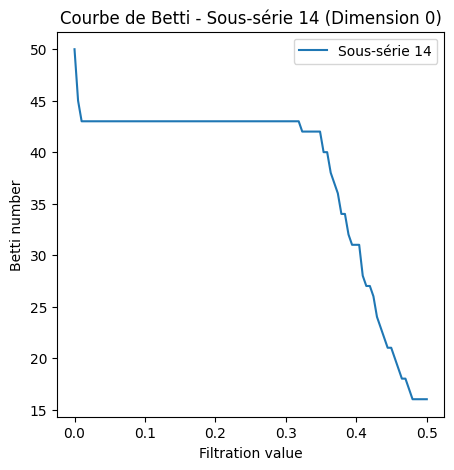

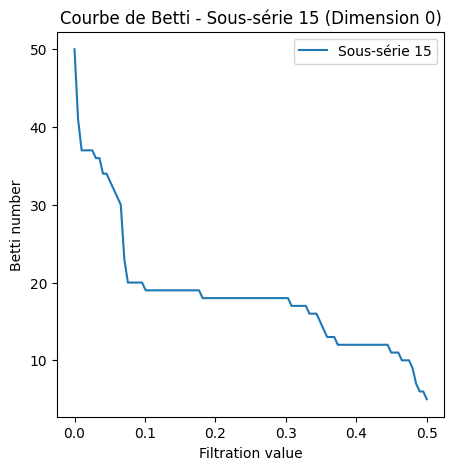

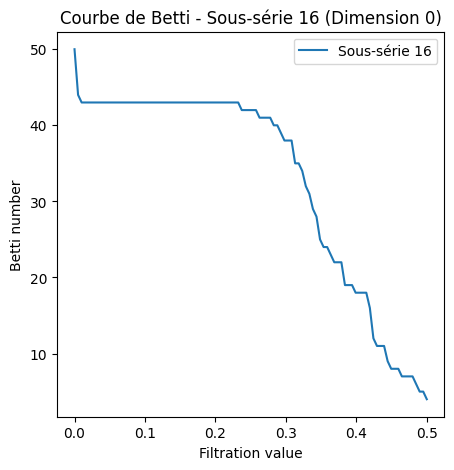

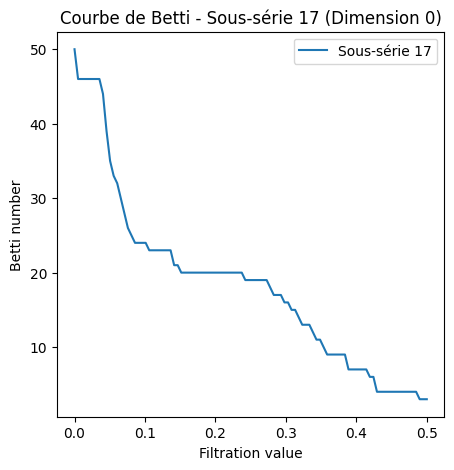

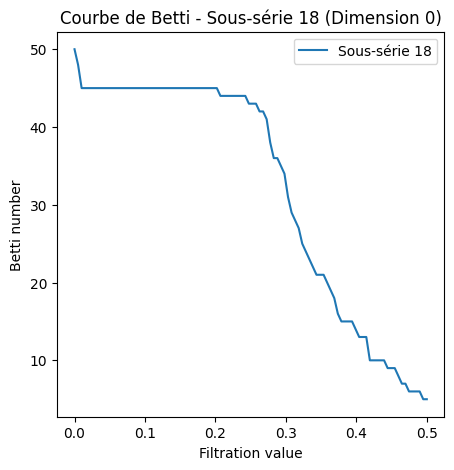

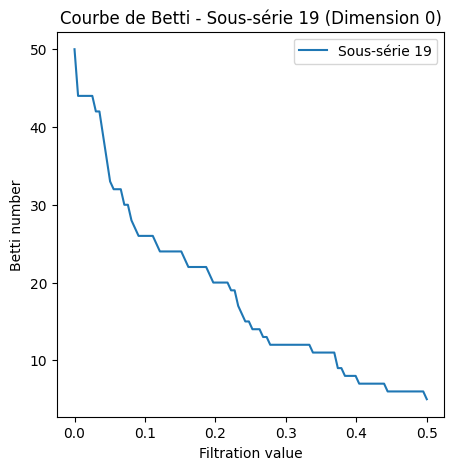

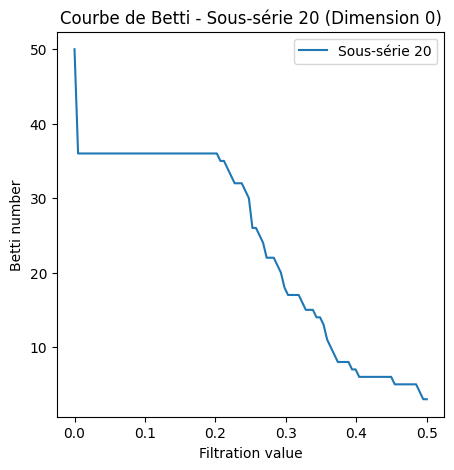

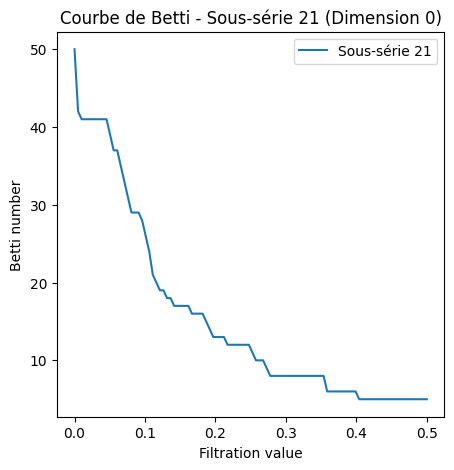

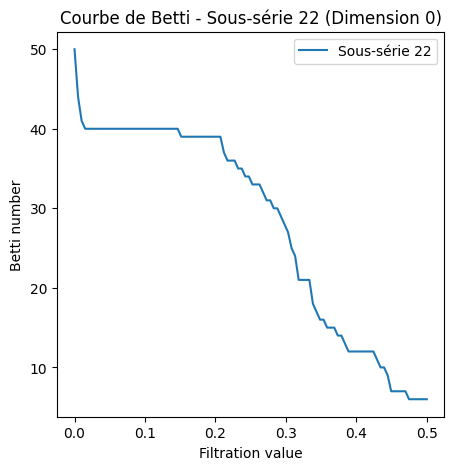

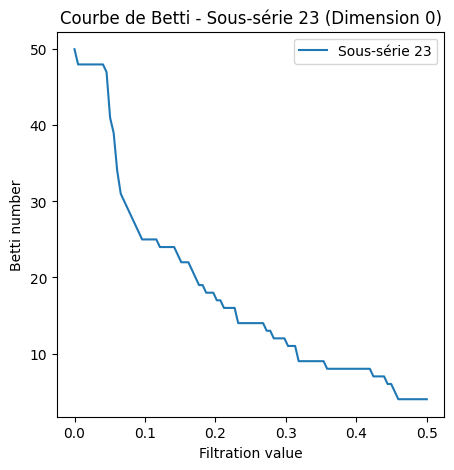

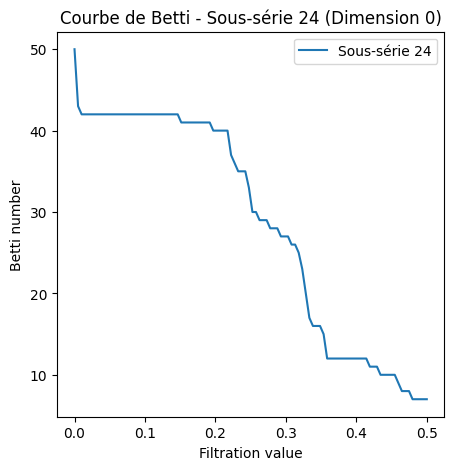

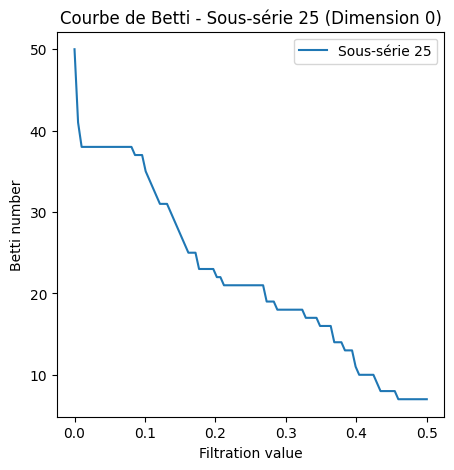

In [ ]:
from gudhi.representations import BettiCurve
import numpy as np
import matplotlib.pyplot as plt

# Paramètres pour calculer les courbes de Betti
sample_range = [0, 0.5]  # Intervalle sur lequel calculer les courbes
n_samples = 100  # Nombre de points d'échantillonnage
sample_points = np.linspace(sample_range[0], sample_range[1], n_samples)

betti_curves = BettiCurve(sample_range=sample_range)#, n_values=n_samples)

# Calculer et tracer les courbes de Betti pour chaque sous-série
for i, simplex_tree in enumerate(rips_complexes):
    # Extraire les intervalles de persistance pour la dimension 0
    intervals_dim_0 = simplex_tree.persistence_intervals_in_dimension(0)

    # Calculer la courbe de Betti pour la dimension 0
    betti_curve_dim_0 = betti_curves.fit_transform([intervals_dim_0])[0]

    # Tracer la courbe de Betti
    plt.figure(figsize=(5, 5))
    plt.plot(sample_points, betti_curve_dim_0, label=f"Sous-série {i + 1}")
    plt.title(f"Courbe de Betti - Sous-série {i + 1} (Dimension 0)")
    plt.xlabel("Filtration value")
    plt.ylabel("Betti number")
    plt.legend()
    plt.show()


Il semble y avoir deux types de courbes similaires, ce qui suggère que les points dans les  sous-séries se regroupent progressivement en deux ensemble à mesure que la filtration progresse. Les similitudes dans les courbes indiquent des structures similaires dans ces sous-séries.

In [2]:
!pip install gudhi
!pip install giotto-tda

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 37.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 30.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 113.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 558.8/558.8 kB 39.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 96.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 460.6/460.6 kB 34.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 66.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1


In [8]:
from gtda.mapper import make_mapper_pipeline, CubicalCover, plot_static_mapper_graph
from sklearn.cluster import DBSCAN
import numpy as np

# Configuration de la pipeline Mapper
n_intervals = 10  # Nombre d'intervalles pour la couverture
overlap = 0.3  # Fraction de chevauchement entre les intervalles
epsilon = 0.1  # Paramètre epsilon pour DBSCAN

pipe = make_mapper_pipeline(
    filter_func=None,  # Utilise les données telles quelles pour l'instant
    cover=CubicalCover(n_intervals=n_intervals, overlap_frac=overlap),
    clusterer=DBSCAN(eps=epsilon),  # Clustering avec DBSCAN
    n_jobs=1
)

# Préparation des données pour le Mapper
# Vous avez déjà normalisé les données numériques. On extrait ici uniquement les colonnes pertinentes.
point_cloud = data[numeric_columns].to_numpy()

# Application de la pipeline Mapper
graph = pipe.fit_transform(point_cloud)

# Paramètres pour le tracé
plotly_params = {"node_trace": {"marker_colorscale": "Blues"}}

# Coloration des nœuds par la colonne 'class' si elle existe
if 'class' in data.columns:
    color_data = data['class']
else:
    color_data = None  # Pas de coloration si 'class' est absente

# Tracé du graphe Mapper
fig = plot_static_mapper_graph(pipe, point_cloud, color_data=color_data, plotly_params=plotly_params)
fig.show()
